In [111]:
#Homework 5 Problem 2: Diffusion Maps

#Import the packages needed

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\chees\AppData\Local\Temp\ipykernel_5516\173829039.py:18: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples[i] = np.random.multivariate_normal(mean, covariance)


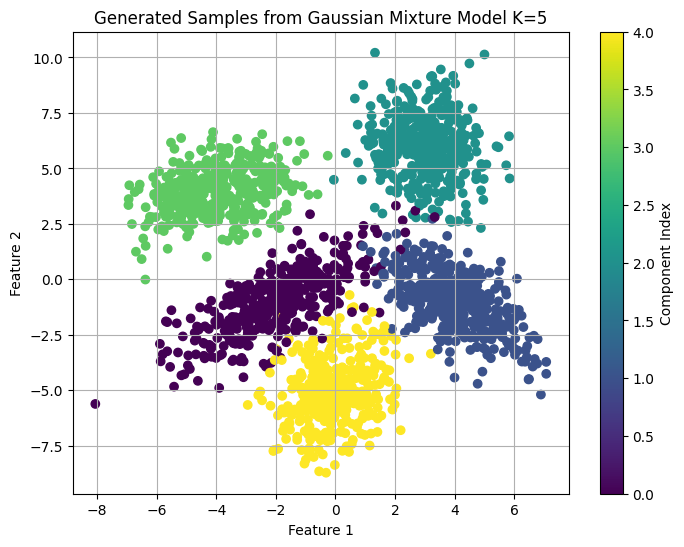

In [112]:
#Generating the Gaussian Data 

K = 5  # Number of gaussian distributions
n_samples = 2000  # Number of samples
means = np.array([[-2, -1], [4, -1], [3, 6], [-4, 4], [0, -5]])  # Mean vectors for each distribution
covariances = np.array([[[3,3], [-2, -1]], [[0, 1], [2, -2]], [[1, -1], [0.25, 2]], [[1.5, 0.5], [0, 1]], [[1, 1], [0, 2]]])  # Covariance matrices for each component
mixture_weights = np.ones(K) / K  # Equal mixture weights for simplicity

# Sample component index for each sample
component_indices = np.random.choice(K, size=n_samples, p=mixture_weights)

# Sample from each component based on the chosen indices
samples = np.zeros((n_samples, 2))
for i in range(n_samples):
    component_index = component_indices[i]
    mean = means[component_index]
    covariance = covariances[component_index]
    samples[i] = np.random.multivariate_normal(mean, covariance)

# Plot the generated samples


plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], c=component_indices, cmap='viridis')
plt.title('Generated Samples from Gaussian Mixture Model K=5')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Component Index')
plt.grid(True)



In [113]:
#Creating the function to generate the diffusion map

#Function to compute the Affinity matrix based on the distances between points
def Comp_affinity_matrix(X, sigma_squared):

    n_samps = X.shape[0]
    affinity_matrix = np.zeros((n_samps,n_samps))
    for i in range(n_samps):
        for j in range(n_samps):
            distance = np.linalg.norm(X[i]-X[j])
            affinity_matrix[i,j] = np.exp(-distance**2/(2*sigma_squared))
    return affinity_matrix

def Comp_degree_matrix(Aff_mat):
    row_sums = np.sum(Aff_mat,axis=1) #sum over the colmuns of the affinity matrix
    #Construct the D matrix from row sums
    D_mat = np.diag(row_sums)
    return D_mat

def Comp_P_mat(Aff_mat,D_mat):
    #compute the inverse of D_mat
    D_inverse = np.linalg.inv(D_mat)
    #Compute the p matrix
    P = np.matmul(D_inverse,Aff_mat)
    return P
#get representation
def Comp_Diffusion(X, sigma, t, n_components):
    #Get Affinity matrix
    Aff = Comp_affinity_matrix(X,sigma)
    #Get Degree matrix
    Degree = Comp_degree_matrix(Aff)
    #Get the P matrix
    P_mat = Comp_P_mat(Aff,Degree)
    #Get the powered matrix
    P_mat_power = np.linalg.matrix_power(P_mat,t)
    #Sort eigenvectors and eigenvalues in descending order
    eigenvalues, eigenvectors = np.linalg.eig(P_mat_power)
    #Sort eigenvectors and eigenvalues in descending order
    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]
    #Return the P matrix, eivenvalues (all), and the prinicpal components for the new representation
    return P_mat_power, eigenvalues, eigenvectors[:, 1:n_components+1] 
 

In [114]:
#Okay lets go through and do this

X = samples
sigma_squared = 1.0

#Computing the P mat powers and their eigenvalues/ eignvectors
t_list = [10,75,100,200,500]

#Compute everything you need
Pmat_t1, eigvals1, Diffusion_map1 = Comp_Diffusion(X,sigma_squared,t_list[0],2)
Pmat_t2, eigvals2, Diffusion_map2 = Comp_Diffusion(X,sigma_squared,t_list[1],2)
Pmat_t3, eigvals3, Diffusion_map3 = Comp_Diffusion(X,sigma_squared,t_list[2],2)
Pmat_t4, eigvals4, Diffusion_map4 = Comp_Diffusion(X,sigma_squared,t_list[3],2)
Pmat_t5, eigvals5, Diffusion_map5 = Comp_Diffusion(X,sigma_squared,t_list[4],2)


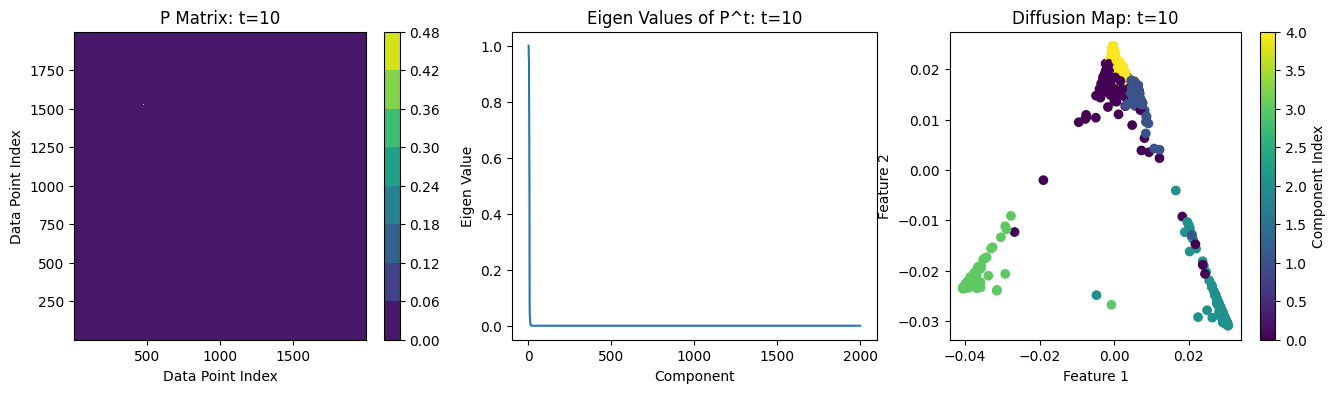

In [115]:


#plot the Results for each T

result_fig_1 = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
c = plt.contourf(Pmat_t1, cmap='viridis',origin='upper')
plt.colorbar(c)
#plt.colorbar(label='P Matrix Value')
plt.title(f'P Matrix: t={t_list[0]}')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
#Eigen values
plt.subplot(1,3,2)
plt.plot(np.arange(1,n_samples+1),eigvals1)
plt.title(f'Eigen Values of P^t: t={t_list[0]}')
plt.ylabel('Eigen Value')
plt.xlabel('Component')
#New Diffusion Representation
plt.subplot(1,3,3)
plt.scatter(Diffusion_map1[:, 0], Diffusion_map1[:, 1], c=component_indices, cmap='viridis')
plt.title(f'Diffusion Map: t={t_list[0]}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Component Index')
result_fig_1.savefig(f'Figures/Problem_2_fig1_t_{t_list[0]}.png',dpi=200)


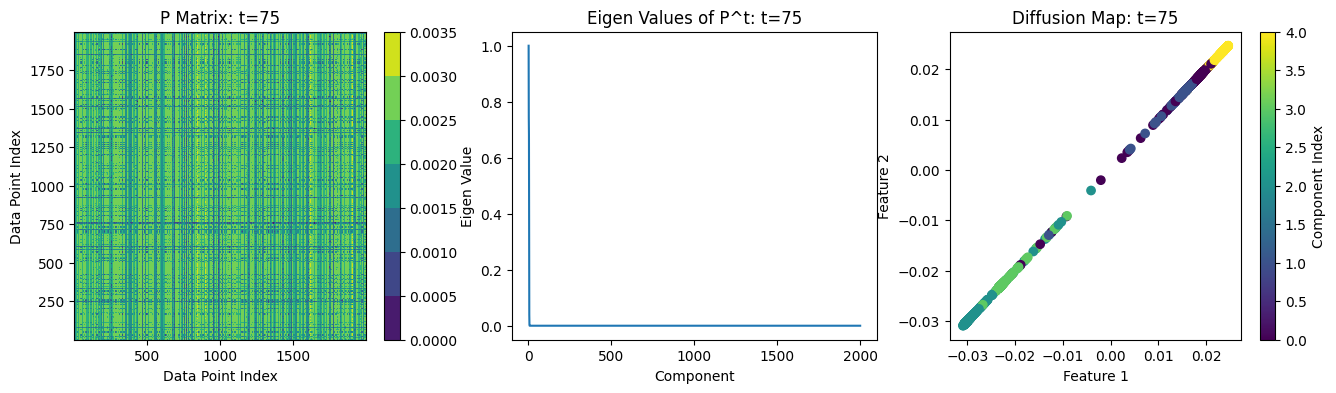

In [116]:
#plot the Results for each T

result_fig_2 = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
c = plt.contourf(Pmat_t2, cmap='viridis',origin='upper')
plt.colorbar(c)
#plt.colorbar(label='P Matrix Value')
plt.title(f'P Matrix: t={t_list[1]}')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
#Eigen values
plt.subplot(1,3,2)
plt.plot(np.arange(1,n_samples+1),eigvals2)
plt.title(f'Eigen Values of P^t: t={t_list[1]}')
plt.ylabel('Eigen Value')
plt.xlabel('Component')
#New Diffusion Representation
plt.subplot(1,3,3)
plt.scatter(Diffusion_map2[:, 1], Diffusion_map2[:, 1], c=component_indices, cmap='viridis')
plt.title(f'Diffusion Map: t={t_list[1]}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Component Index')
result_fig_2.savefig(f'Figures/Problem_2_fig2_t_{t_list[1]}.png',dpi=200)


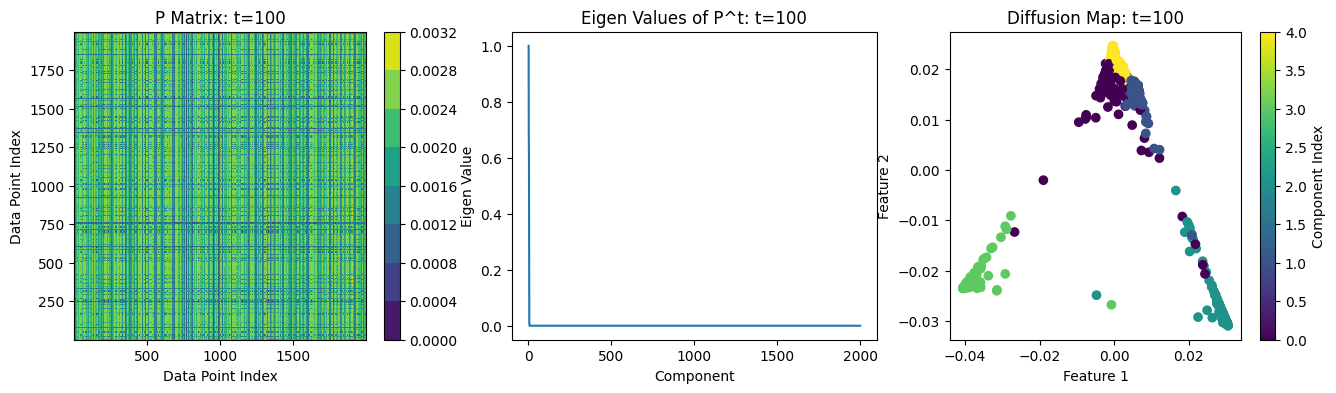

In [117]:
#plot the Results for each T

result_fig_3 = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
c = plt.contourf(Pmat_t3, cmap='viridis',origin='upper')
plt.colorbar(c)
#plt.colorbar(label='P Matrix Value')
plt.title(f'P Matrix: t={t_list[2]}')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
#Eigen values
plt.subplot(1,3,2)
plt.plot(np.arange(1,n_samples+1),eigvals3)
plt.title(f'Eigen Values of P^t: t={t_list[2]}')
plt.ylabel('Eigen Value')
plt.xlabel('Component')
#New Diffusion Representation
plt.subplot(1,3,3)
plt.scatter(Diffusion_map3[:, 0], Diffusion_map3[:, 1], c=component_indices, cmap='viridis')
plt.title(f'Diffusion Map: t={t_list[2]}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Component Index')
result_fig_3.savefig(f'Figures/Problem_2_fig3_t_{t_list[2]}.png',dpi=200)


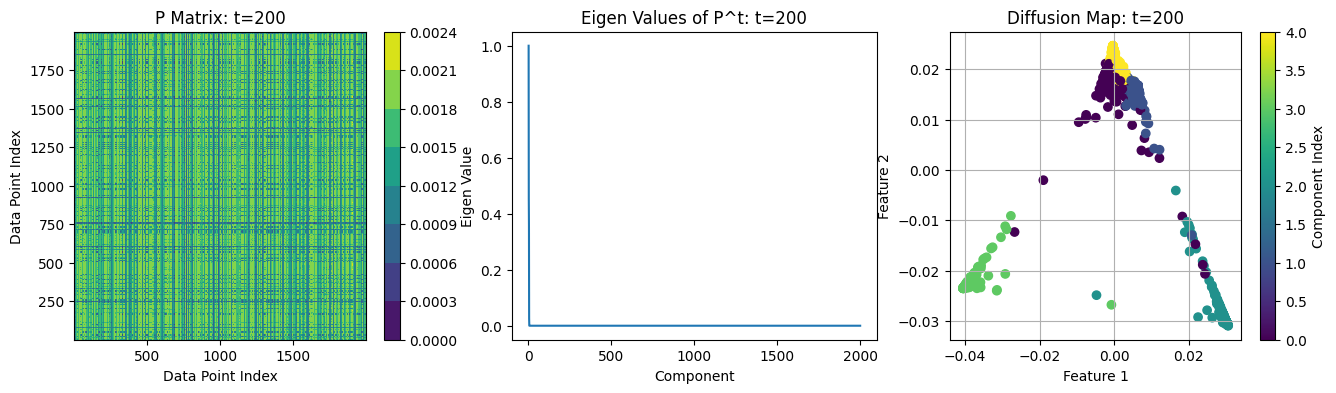

In [118]:
#plot the Results for t = 4

result_fig_4 = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
c = plt.contourf(Pmat_t4, cmap='viridis',origin='upper')
plt.colorbar(c)
#plt.colorbar(label='P Matrix Value')
plt.title(f'P Matrix: t={t_list[3]}')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
#Eigen values
plt.subplot(1,3,2)
plt.plot(np.arange(1,n_samples+1),eigvals4)
plt.title(f'Eigen Values of P^t: t={t_list[3]}')
plt.ylabel('Eigen Value')
plt.xlabel('Component')
#New Diffusion Representation
plt.subplot(1,3,3)
plt.scatter(Diffusion_map4[:, 0], Diffusion_map4[:, 1], c=component_indices, cmap='viridis')
plt.title(f'Diffusion Map: t={t_list[3]}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Component Index')
plt.grid(True)
result_fig_4.savefig(f'Figures/Problem_2_fig4_t_{t_list[3]}.png',dpi=200)


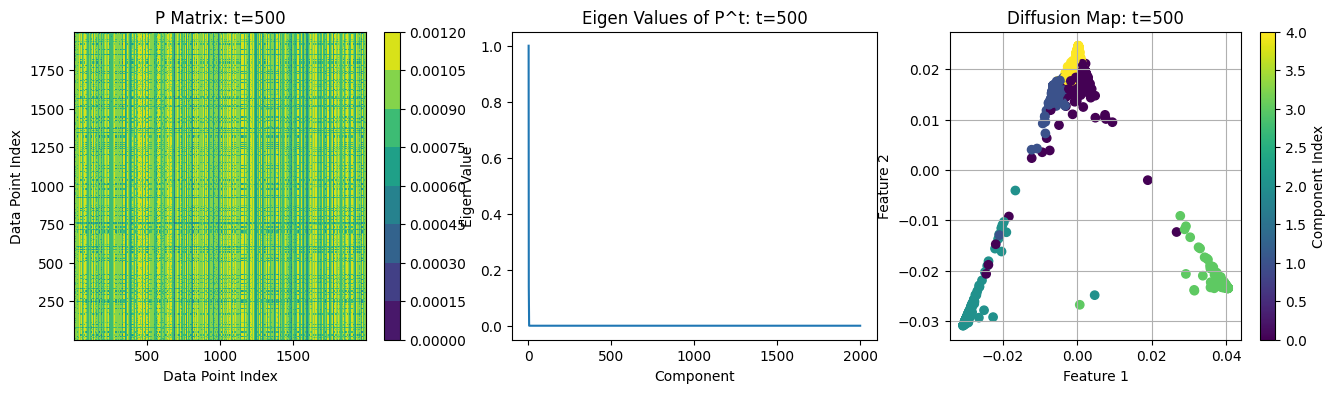

In [119]:
#plot the Results for each T

result_fig_5 = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
c = plt.contourf(Pmat_t5, cmap='viridis',origin='upper')
plt.colorbar(c)
#plt.colorbar(label='P Matrix Value')
plt.title(f'P Matrix: t={t_list[4]}')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
#Eigen values
plt.subplot(1,3,2)
plt.plot(np.arange(1,n_samples+1),eigvals5)
plt.title(f'Eigen Values of P^t: t={t_list[4]}')
plt.ylabel('Eigen Value')
plt.xlabel('Component')
#New Diffusion Representation
plt.subplot(1,3,3)
plt.scatter(Diffusion_map5[:, 0], Diffusion_map5[:, 1], c=component_indices, cmap='viridis')
plt.title(f'Diffusion Map: t={t_list[4]}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Component Index')
plt.grid(True)
result_fig_5.savefig(f'Figures/Problem_2_fig5_t_{t_list[4]}.png',dpi=200)